<a href="https://colab.research.google.com/github/Parvez13/TensorFlow-Developer-Certification/blob/master/03_introduction_to_computers_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision With TensorFlow

Computer Vision is the practice of writing algorithms which cna discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.  

# Get the data

The images we're working with are from the Food101 dataset (101 different classes of food):https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza🍕 & steak 🥩) using the image data modification note:https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb


## Inspect the data (become one with it)

A very crucial step at the beginning of any mahcine learning project is becoming one with the data.

And for a computer vision project...this  usually means visualizing many samples of your data

In [ ]:
import os


# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('drive/MyDrive/pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")



There are 2 directories and 1 images in 'drive/MyDrive/pizza_steak'.
There are 2 directories and 1 images in 'drive/MyDrive/pizza_steak/train'.
There are 0 directories and 750 images in 'drive/MyDrive/pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'drive/MyDrive/pizza_steak/train/steak'.
There are 2 directories and 1 images in 'drive/MyDrive/pizza_steak/test'.
There are 0 directories and 250 images in 'drive/MyDrive/pizza_steak/test/steak'.
There are 0 directories and 250 images in 'drive/MyDrive/pizza_steak/test/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("drive/MyDrive/pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("drive/MyDrive/pizza_steak/train")
# Created a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:] # remove .DS_store
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape : {img.shape}") # Show the shape of the image

  return img

['229323.jpg']
Image shape : (512, 382, 3)


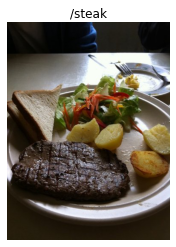

In [ ]:
# view a random image from the training dataset
img  = view_random_image(target_dir='drive/MyDrive/pizza_steak/train',
                         target_class='/steak')

['256592.jpg']
Image shape : (384, 512, 3)


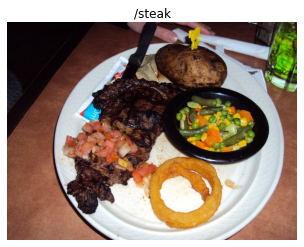

In [ ]:
img  = view_random_image(target_dir='drive/MyDrive/pizza_steak/train',
                         target_class='/steak')

['231296.jpg']
Image shape : (382, 512, 3)


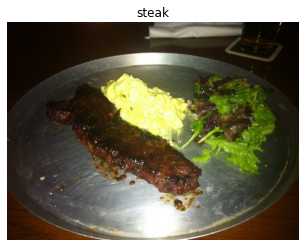

In [ ]:
img  = view_random_image(target_dir='drive/MyDrive/pizza_steak/train/',
                         target_class='steak')

['3595758.jpg']
Image shape : (512, 512, 3)


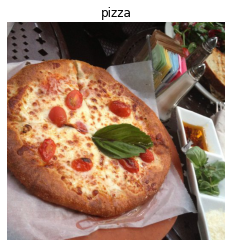

In [ ]:
img  = view_random_image(target_dir='drive/MyDrive/pizza_steak/train/',
                         target_class='pizza')

['1512514.jpg']
Image shape : (512, 512, 3)


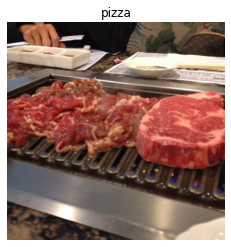

In [ ]:
img = view_random_image(target_dir='drive/MyDrive/pizza_steak/train/',
                        target_class='pizza')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 26,  27,  31],
        [ 24,  25,  29],
        [ 21,  22,  26],
        ...,
        [ 69,  75,  63],
        [ 69,  77,  66],
        [ 66,  76,  67]],

       [[ 24,  25,  29],
        [ 23,  24,  28],
        [ 22,  23,  27],
        ...,
        [ 66,  72,  60],
        [ 69,  77,  66],
        [ 71,  79,  68]],

       [[ 21,  22,  26],
        [ 22,  23,  27],
        [ 22,  23,  27],
        ...,
        [ 58,  61,  50],
        [ 61,  67,  57],
        [ 63,  71,  60]],

       ...,

       [[132, 101,  72],
        [132, 101,  72],
        [132, 101,  72],
        ...,
        [230, 209, 182],
        [231, 210, 183],
        [231, 210, 183]],

       [[132, 101,  72],
        [131, 100,  71],
        [130,  99,  70],
        ...,
        [230, 206, 180],
        [230, 206, 180],
        [230, 206, 180]],

       [[132, 101,  72],
        [131, 100,  71],
        [129,  98,  69],
        ...,
        [229, 205, 17

In [ ]:
img.min(), img.max()

(0, 255)

In [ ]:
# View the image shape
img.shape # returns width, height,colour channels


(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.10196078, 0.10588235, 0.12156863],
        [0.09411765, 0.09803922, 0.11372549],
        [0.08235294, 0.08627451, 0.10196078],
        ...,
        [0.27058824, 0.29411765, 0.24705882],
        [0.27058824, 0.30196078, 0.25882353],
        [0.25882353, 0.29803922, 0.2627451 ]],

       [[0.09411765, 0.09803922, 0.11372549],
        [0.09019608, 0.09411765, 0.10980392],
        [0.08627451, 0.09019608, 0.10588235],
        ...,
        [0.25882353, 0.28235294, 0.23529412],
        [0.27058824, 0.30196078, 0.25882353],
        [0.27843137, 0.30980392, 0.26666667]],

       [[0.08235294, 0.08627451, 0.10196078],
        [0.08627451, 0.09019608, 0.10588235],
        [0.08627451, 0.09019608, 0.10588235],
        ...,
        [0.22745098, 0.23921569, 0.19607843],
        [0.23921569, 0.2627451 , 0.22352941],
        [0.24705882, 0.27843137, 0.23529412]],

       ...,

       [[0.51764706, 0.39607843, 0.28235294],
        [0.51764706, 0.39607843, 0.28235294],
        [0.51764706, 0

🔑**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this,one of the most common preprocessing steps for working with images is to **scale**(also referred to as **normalize**) their pixel values by dividing the image arrays by 255.(since 255 is the maximum pixel value).


## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to :

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data( get all of the pixel values between 0 &1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "drive/MyDrive/pizza_steak/train"
test_dir = "drive/MyDrive/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode = 'binary',
                                           seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation='relu',
                             input_shape=(224, 224, 3)),
      tf.keras.layers.Conv2D(10,3, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2,
                                padding='valid'),
      tf.keras.layers.Conv2D(10, 3, activation='relu'),
      tf.keras.layers.Conv2D(10, 3, activation='relu'),
      tf.keras.layers.MaxPool2D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model
#history_1 = model_1.fit(train_data,
                        #epochs=5,
                        #steps_per_epoch=len(train_data),
                        #validation_data=valid_data,
                        #validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

### Using the same model as before



In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow Playground model
model_2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
#history_2 = model_2.fit(train_data,
                        # #epochs=5,
                        # steps_per_epoch =len(train_data),
                        # validation_data=valid_data,
                        # validation_steps=len(valid_data))

Despite having 20X more parameters than our CNN (model_1), model_2 performs terribly...let's try to improve it

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as aboe but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
# history_3 = model_3.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

In [ ]:
# Get the summary of model_3
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

## Binary Classification: Let's break it down.

1. Become one with the data (visualize, visualize, visualize).
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseling)
4. Fit the model
5. Evaluate the model.
6. Adjust different parameters and improve the model(try to beat our baseline).
7. Repeat until satisfied (experiment, experiment, experiment).

## 1. Become one with the data.

['368162.jpg']
Image shape : (512, 384, 3)
['13983.jpg']
Image shape : (384, 512, 3)


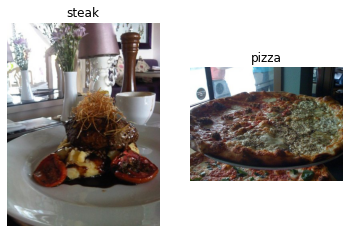

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('drive/MyDrive/pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('drive/MyDrive/pizza_steak/train/', 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = 'drive/MyDrive/pizza_steak/train/'
test_dir = 'drive/MyDrive/pizza_steak/test/'

Our next step is to turn our data into **batches**


A batch is a small subset of data. Rather than look at all~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images(or more) might not fit into the memory of your processor(GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.



In [ ]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the 'next' batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:3], images[0].shape

(array([[[[0.5764706 , 0.21960786, 0.00392157],
          [0.58431375, 0.22352943, 0.02352941],
          [0.59607846, 0.23529413, 0.0509804 ],
          ...,
          [0.6509804 , 0.39607847, 0.1764706 ],
          [0.6313726 , 0.39607847, 0.18431373],
          [0.6313726 , 0.427451  , 0.19215688]],
 
         [[0.57254905, 0.23529413, 0.01176471],
          [0.5882353 , 0.23529413, 0.03137255],
          [0.58431375, 0.22352943, 0.03137255],
          ...,
          [0.6901961 , 0.4431373 , 0.12941177],
          [0.69803923, 0.46274513, 0.1764706 ],
          [0.6509804 , 0.4156863 , 0.17254902]],
 
         [[0.5647059 , 0.24313727, 0.01568628],
          [0.5568628 , 0.22352943, 0.00784314],
          [0.5568628 , 0.21176472, 0.01568628],
          ...,
          [0.69803923, 0.44705886, 0.09411766],
          [0.654902  , 0.40000004, 0.07058824],
          [0.6745098 , 0.41960788, 0.16078432]],
 
         ...,
 
         [[0.6745098 , 0.4784314 , 0.12941177],
          [0.72941

In [ ]:
images[30]

array([[[0.64705884, 0.6392157 , 0.68235296],
        [0.7372549 , 0.68235296, 0.67058825],
        [0.7176471 , 0.60784316, 0.52156866],
        ...,
        [0.80392164, 0.8117648 , 0.8000001 ],
        [0.7490196 , 0.7843138 , 0.8117648 ],
        [0.7137255 , 0.7843138 , 0.8313726 ]],

       [[0.6784314 , 0.69411767, 0.7058824 ],
        [0.76470596, 0.7294118 , 0.67058825],
        [0.73333335, 0.6313726 , 0.48627454],
        ...,
        [0.7803922 , 0.7803922 , 0.7725491 ],
        [0.7411765 , 0.7803922 , 0.81568635],
        [0.70980394, 0.7803922 , 0.8352942 ]],

       [[0.68235296, 0.69803923, 0.69411767],
        [0.7960785 , 0.75294125, 0.6666667 ],
        [0.80392164, 0.69411767, 0.5058824 ],
        ...,
        [0.7803922 , 0.77647066, 0.7686275 ],
        [0.7372549 , 0.7843138 , 0.8313726 ],
        [0.7058824 , 0.7803922 , 0.83921576]],

       ...,

       [[0.9450981 , 0.8196079 , 0.65882355],
        [0.9450981 , 0.8196079 , 0.65882355],
        [0.94117653, 0

In [ ]:
# View the first batch of labels
labels

array([0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,
               kernel_size=3,
               strides=1,
               padding='valid',
               activation='relu',
               input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 2, activation='relu'),
    Conv2D(10, 2, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 221, 221, 10)      410       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 220, 220, 10)      410       
_________________________________________________________________
flatten_10 (Flatten)         (None, 484000)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 484001    
Total params: 485,101
Trainable params: 485,101
Non-trainable params: 0
_________________________________________________________________


## 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
# history_4 = model_4.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

### 5. Evlauating our model

It looks like our model is learning something, let's evaluate it.

In [6]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curve for training and validation metrics

  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']


  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss,label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # PLot accuracy
  plt.figure()
  plt.plot(epochs, accuracy,label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

> **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

In [ ]:
# Check out the loss and accuracy of model_4
# plot_loss_curves(history_4)

### 6. Adjust the model parameters


Fitting a machine learning model comes in 3 steps

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers(such as MaxPool2D)
* Add more data..

> 🔑**Note:** Reducing overfitting is also known as **Regularization**

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')

])

In [ ]:
# compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [ ]:
# # Fit the model
# history_5 = model_5.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(valid_data))

In [ ]:
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
flatten_11 (Flatten)         (None, 27040)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)               

In [ ]:
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator withour data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator without data augmentation for the tet dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it cropping it or something similar

Let's write some code to visualize data augmentation

In [ ]:
# Import data and augment it from training directory
print("Augmented  training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # for demonstration purposes only

# Create non_augmented train data batchs
print('Non-augmented training data: ')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

IMG_SIZE= (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             class_mode='binary')




Augmented  training data
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!


In [ ]:
#Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

showing image number: 2


(-0.5, 223.5, 223.5, -0.5)

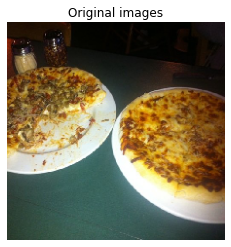

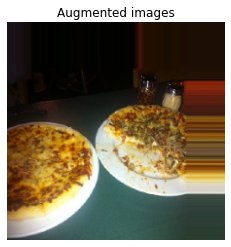

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # our batch size are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original images")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented images")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
      Conv2D(10, 3 ,activation='relu'),
      MaxPool2D(pool_size=2),
      Conv2D(10, 3,activation='relu'),
      MaxPool2D(),
      Conv2D(10,3, activation='relu'),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation='sigmoid')
])

# compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# # Fit the model
# history_6 = model_6.fit(train_data_augmented,
#                         epochs=5,
#                         steps_per_epoch=len(train_data_augmented),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

In [ ]:
# Check our models training curves
# plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before ) on  it and see what happens

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode='binary',
                                                                            shuffle=True) # shufffle these data

In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
      Conv2D(10,3, activation='relu', input_shape=(224, 224,3)),
      MaxPool2D(),
      Conv2D(10,3, activation='relu'),
      MaxPool2D(),
      Conv2D(10,3, activation='relu'),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# # Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 511ms/step - loss: 0.6774 - accuracy: 0.5580 - val_loss: 0.5727 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 24s 503ms/step - loss: 0.5611 - accuracy: 0.7093 - val_loss: 0.4256 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 23s 487ms/step - loss: 0.5297 - accuracy: 0.7400 - val_loss: 0.3678 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 24s 515ms/step - loss: 0.5104 - accuracy: 0.7633 - val_loss: 0.3612 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 23s 494ms/step - loss: 0.4737 - accuracy: 0.7893 - val_loss: 0.3276 - val_accuracy: 0.8760


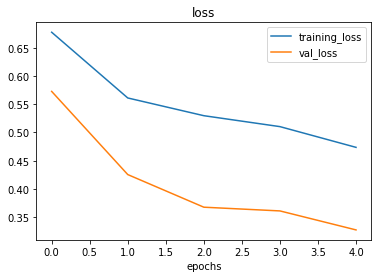

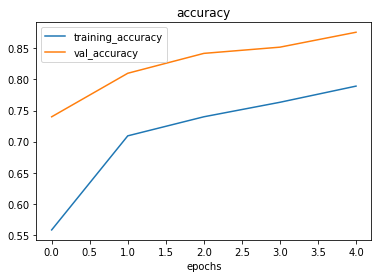

In [ ]:
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data,the model gets exposed to all different kinds of data using training, thus enabling it to learn features across a wide array of images(in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g from 10 to 32 or even 64)
* Train for longer (more epochs)
* Get more data (give  the model the opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> ⛏ **Pracice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffle training data.

## Making a prediction with our trained model on our own custom data

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')


--2021-07-16 03:14:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-07-16 03:14:54 (32.5 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



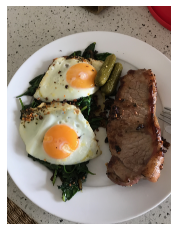

In [ ]:
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape


(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

> 🔑**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data(or new data) is preprocessed into the same format as the data your model was trained on

In [36]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):

  """
  Reads an image from filename, turns it into a tensor and 
  reshapes it to (img_shape, img_shape, colour_channels).

  """
  
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  # Return image
  return img

In [ ]:
# Load in and preprocess  our custorm image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.8952412]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently output's a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction

In [ ]:
# remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# We can index the predicted class by rounding the prediction  probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]

In [ ]:
pred_class

'steak'

In [29]:
def pred_and_plot(model, filename, class_names=class_names):

  """
  Imports an image located at filename, make a prediction with model
  and plots the image with the predicted class as the title.

  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Predictionn : {pred_class}")
  plt.axis(False);

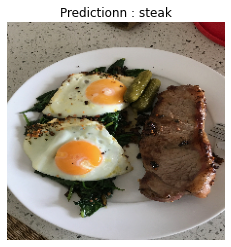

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image..this time pizza🍕

In [ ]:
# Download another test custome image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread("03-pizza-dad.jpeg")

--2021-07-16 03:16:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2021-07-16 03:16:32 (32.5 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



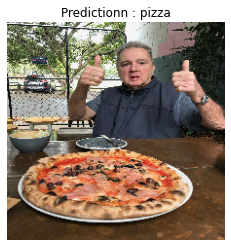

In [ ]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

### Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model.
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Reapeat until satisfied.

### 1. Import and become one with data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-07-17 03:54:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   243MB/s    in 2.0s    

2021-07-17 03:54:51 (243 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [3]:
# Setup train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Let's get the class name
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1415301.jpg']
Image shape : (384, 512, 3)


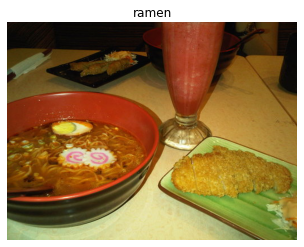

In [8]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare if for a model)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale to 0 to 1
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [10]:
# Load data in ffrom directories and turn it into batchs
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224))

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


# Create  our model
model_8 = Sequential([
        Conv2D(10,3, input_shape=(224, 224, 3), activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(10, activation='softmax')
])


# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

## 4. Fit the model

In [13]:
# Fit the model
# history_8 = model_8.fit(train_data,
#                         epochs=5,
#                         batch_size=32,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

## 5. Evaluate the model

In [ ]:
# # Evaluate on the test data
# model_8.evaluate(test_data)

In [ ]:
# plot_loss_curves(history_8)

What do these loss curves tell us?


Well... it seems our model is **Overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to genralize well to unseen data and performs poorly on the test dataset.

## 6. Adjust the model hyperparameters (to beat the baseline reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data(overfitting).

So, let's try and fix overfitting by...

* **Get more data**- having more data gives a model more opportunity to learn diverse patterns..
* **Simpliy the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation**- data augmentation manipulates the training data in sucha a way to add more diversity to it (withour altering the original data)
* **Use transfer learning**- transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [ ]:
# How about we try and simplify the model first 2
# Let's try to remove 2 convolutional layer
# model_9 = Sequential([
#       Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
#       MaxPool2D(),
#       Conv2D(10, 3, activation='relu'),
#       MaxPool2D(),
#       Flatten(),
#       Dense(10, activation='softmax')

# ])

# model_9.compile(loss='categorical_crossentropy',
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['accuracy'])

In [ ]:
# Fit the model with 2x conv layers removed
# history_9 = model_9.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data))

In [ ]:
# model_9.summary()

In [ ]:
# model_8.summary()

Looks like our 'simplifying the model' experiment didn't work... the accuracy went down and overfitting continued..
How about we try data augmentation?

## Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data..
Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [16]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [17]:
# Let's create anotner model but this time we'll fit it on the augmented data
model_10 = tf.keras.models.clone_model(model_8)


# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [18]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [19]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [20]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 112s 476ms/step - loss: 2.2119 - accuracy: 0.1816 - val_loss: 2.1264 - val_accuracy: 0.2540
Epoch 2/5
235/235 [==============================] - 111s 474ms/step - loss: 2.1241 - accuracy: 0.2327 - val_loss: 2.0053 - val_accuracy: 0.2980
Epoch 3/5
235/235 [==============================] - 112s 478ms/step - loss: 2.0853 - accuracy: 0.2577 - val_loss: 1.9706 - val_accuracy: 0.3020
Epoch 4/5
235/235 [==============================] - 111s 474ms/step - loss: 2.0602 - accuracy: 0.2756 - val_loss: 1.9262 - val_accuracy: 0.3528
Epoch 5/5
235/235 [==============================] - 112s 475ms/step - loss: 2.0272 - accuracy: 0.2856 - val_loss: 1.9580 - val_accuracy: 0.3032


In [21]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.9923 - accuracy: 0.2972


[1.9923475980758667, 0.2971999943256378]

In [22]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 1.9580 - accuracy: 0.3032


[1.9579699039459229, 0.30320000648498535]

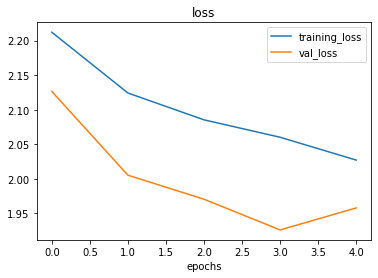

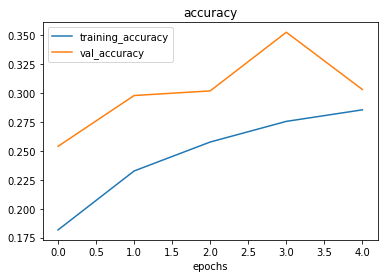

In [24]:
# Check out our model trained on augmented data's loss curces
plot_loss_curves(history_10)

# 7. Repeat untill satisfied

We could keep going here.. continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructing our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparametes in our ImageDataGenerator instance)
- Training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [26]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [28]:
# Download some custom images
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-07-17 04:38:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.1s    

2021-07-17 04:38:30 (31.0 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2021-07-17 04:38:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

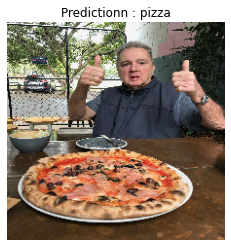

In [52]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

In [51]:
def pred_and_plot(model, filename, class_names=class_names):

  """
  Imports an image located at filename, make a prediction with model
  and plots the image with the predicted class as the title.

  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
      pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Predictionn : {pred_class}")
  plt.axis(False);

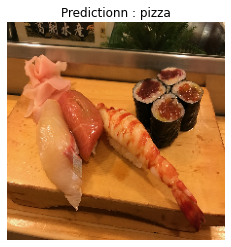

In [58]:
pred_and_plot(model=model_10,
              filename='03-sushi.jpeg',
              class_names=class_names)

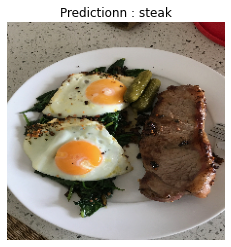

In [57]:
pred_and_plot(model=model_10,
              filename='03-steak.jpeg',
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [59]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [60]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 141ms/step - loss: 1.9580 - accuracy: 0.3032


[1.9579695463180542, 0.30320000648498535]

In [61]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 1.9580 - accuracy: 0.3032


[1.9579697847366333, 0.30320000648498535]